# Data Creation

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from karpiu.simulation import make_mmm_daily_data

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
N_STEPS = 365 * 3
COEFS = [0.03, 0.05, 0.028, 0.01, 0.03]
CHANNELS = ['tv', 'radio', 'social', 'promo', 'search']
LOC = np.array([10000, 5000, 3000, 2000, 850])
SCALE = np.array([5000,3000, 1000, 550, 500])
SCALABILITY =  np.array([1.1, 0.75, 1.3, 1.5, 0.9])
SEED = 2022
START_DATE = '2019-01-01'

In [180]:
from karpiu.simulation import make_adstock_matrix

In [181]:
adstock_matrix = make_adstock_matrix(
    n_steps=28, 
    peak_step = np.array([10, 8, 5, 3, 2]),
    left_growth = np.array([.05, .08, .1, .5, .75]),
    right_growth = np.array([-.03, -0.6, -0.5, -.1, -.25]),
)

In [185]:
adstock_matrix

array([[2.90677144e-02, 3.05211001e-02, 3.20471551e-02, 3.36495128e-02,
        3.53319885e-02, 3.70985879e-02, 3.89535173e-02, 4.09011932e-02,
        4.29462528e-02, 4.50935655e-02, 4.50935655e-02, 4.37407585e-02,
        4.24285357e-02, 4.11556797e-02, 3.99210093e-02, 3.87233790e-02,
        3.75616776e-02, 3.64348273e-02, 3.53417825e-02, 3.42815290e-02,
        3.32530831e-02, 3.22554907e-02, 3.12878259e-02, 3.03491912e-02,
        2.94387154e-02, 2.85555540e-02, 2.76988873e-02, 2.68679207e-02],
       [7.41124952e-02, 8.00414948e-02, 8.64448144e-02, 9.33603996e-02,
        1.00829232e-01, 1.08895570e-01, 1.17607216e-01, 1.27015793e-01,
        1.27015793e-01, 5.08063172e-02, 2.03225269e-02, 8.12901075e-03,
        3.25160430e-03, 1.30064172e-03, 5.20256688e-04, 2.08102675e-04,
        8.32410700e-05, 3.32964280e-05, 1.33185712e-05, 5.32742848e-06,
        2.13097139e-06, 8.52388557e-07, 3.40955423e-07, 1.36382169e-07,
        5.45528677e-08, 2.18211471e-08, 8.72845883e-09, 3.49138

In [16]:
df, scalability_df = make_mmm_daily_data(    
    coefs=COEFS,
    channels=CHANNELS,
    features_loc=LOC,
    features_scale=SCALE,
    scalability=SCALABILITY,
    n_steps=N_STEPS,
    seed=SEED,
)

In [95]:
df.head(3)

,date,sales,tv,radio,social,promo,search
0,2019-01-01,475.0,9998.0,4176.0,0.0,0.0,992.0
1,2019-01-02,785.0,13805.0,0.0,3541.0,0.0,1039.0
2,2019-01-03,786.0,9549.0,0.0,4143.0,1156.0,419.0


In [20]:
scalability_df.head(3)

,regressor,scalability
0,tv,1.10
1,radio,0.75
2,social,1.30


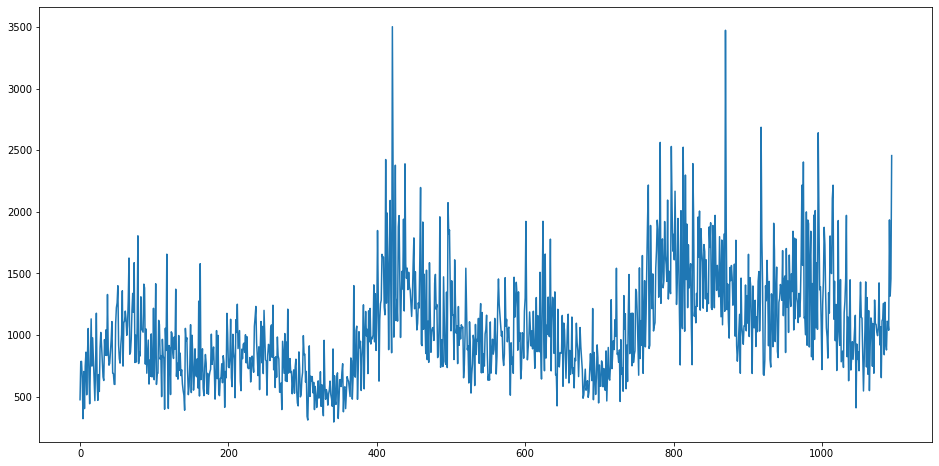

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(data['sales'].values);

In [ ]:
# df.to_csv('data.csv', index=False)
# scalability_df.to_csv('scalability_df.csv', index=False)